In [1]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
import glob
import seaborn as sns
sns.set_style("white")
import pandas as pd

In [2]:
feat_all_o = []
for file in sorted(glob.glob('*MD*-OPEN-ABS-SUM-RRCS.pkl')):

	#out_file = file.replace('-CONTACT.pkl','')

	feat_file_o = pickle.load(open(file, 'rb'))
	feat_all_o.append(feat_file_o)

feat_all_o = np.array(feat_all_o)
feat_all_c = []

for file in sorted(glob.glob('*MD*-CLOSED-ABS-SUM-RRCS.pkl')):

	#out_file = file.replace('-CONTACT.pkl','')

	feat_file_c = pickle.load(open(file, 'rb'))
	feat_all_c.append(feat_file_c)

feat_all_c = np.array(feat_all_c)

In [3]:
print(feat_all_o.shape, feat_all_c.shape)

(87, 26106) (87, 26106)


In [4]:
open_rrcs = np.sum(feat_all_o,axis=0)
closed_rrcs = np.sum(feat_all_c,axis=0)

In [5]:
open_rrcs.shape

(26106,)

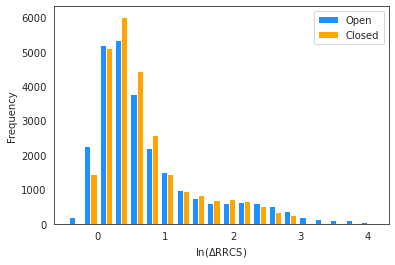

In [6]:
open_rrcs_log = np.log(open_rrcs/10**6)
closed_rrcs_log = np.log(closed_rrcs/10**6)
plt.hist([open_rrcs_log, closed_rrcs_log],bins=20,label=['Open','Closed'],color=["dodgerblue","orange"])
plt.xlabel('ln($\Delta$RRCS)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
from scipy import stats
zscores = stats.zscore(open_rrcs_log)
selected_dist_ind_o = []
for i in range(len(zscores)):
    if zscores[i] >= 1.5 or zscores[i] <= -1.5:
        selected_dist_ind_o.append(i)

In [8]:
len(selected_dist_ind_o)

2924

In [9]:
minnumo = np.min(open_rrcs_log)
maxnumo = np.max(open_rrcs_log)
#getting the max/min values of -1.5<z-score<1.5 region
for i in selected_dist_ind_o:
    if open_rrcs_log[i] > 0:
        if open_rrcs_log[i] < maxnumo:
            maxnumo = open_rrcs_log[i]
    if open_rrcs_log[i] < 0:
        if open_rrcs_log[i] > minnumo:
            minnumo = open_rrcs_log[i]
print(minnumo, maxnumo)

-0.4544042349344821 1.9709003480244867


In [10]:
zscores = stats.zscore(closed_rrcs_log)
selected_dist_ind_c = []
for i in range(len(zscores)):
    if zscores[i] >= 1.5 or zscores[i] <= -1.5:
        selected_dist_ind_c.append(i)
minnumc = np.min(closed_rrcs_log)
maxnumc = np.max(closed_rrcs_log)
for i in selected_dist_ind_c:
    if closed_rrcs_log[i] > 0:
        if open_rrcs_log[i] < maxnumc:
            maxnumc = closed_rrcs_log[i]
    if closed_rrcs_log[i] < 0:
        if open_rrcs_log[i] > minnumc:
            minnumc = closed_rrcs_log[i]
print(len(selected_dist_ind_c),minnumc,maxnumc)

2899 -0.3657658736471608 1.8425428836489053


/home/anhtn2/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/anhtn2/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PLPG Bilayer, RRCS Distribution')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


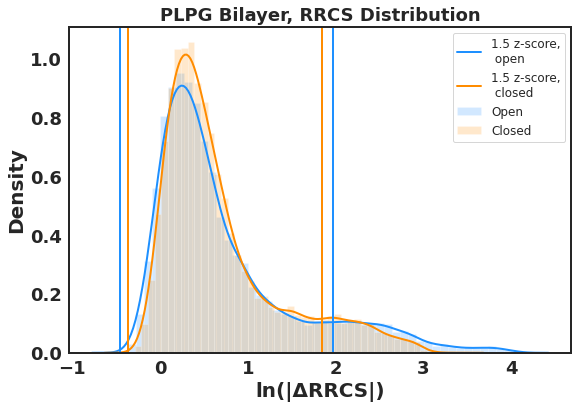

In [11]:
fig, axs = plt.subplots(1,1,figsize=(9,6))
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})
sns.distplot(open_rrcs_log, color="dodgerblue", label='Open', bins=50, **kwargs)
sns.distplot(closed_rrcs_log, color="darkorange", label='Closed', bins=50, **kwargs)
#sns.distplot([open_rrcs_log, closed_rrcs_log], color=[]"orange", label='Closed', **kwargs)
plt.xlabel('ln(|ΔRRCS|)', fontsize = '20',fontweight='bold')
plt.ylabel('Density',fontsize = '20',fontweight='bold')
plt.axvline(x=minnumo,c="dodgerblue",label='1.5 z-score,\n open',linewidth=2)
plt.axvline(x=maxnumo,c="dodgerblue",linewidth=2)
plt.axvline(x=minnumc,c="darkorange",label='1.5 z-score,\n closed',linewidth=2)
plt.axvline(x=maxnumc,c="darkorange",linewidth=2)
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)
axs.tick_params(width=2)
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize='12')
plt.title('PLPG Bilayer, RRCS Distribution', fontsize=18, fontname='Arial',fontweight='bold')
#plt.savefig('POPG-RRCS.png',dpi=600)

In [12]:
final_ind = np.union1d(sorted(selected_dist_ind_c),sorted(selected_dist_ind_o))
np.save('FEATURE-oASIS-SET-PLPG.npy',final_ind)